In [2]:
# Importing the modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import imutils
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,MaxPool2D,Dense,Dropout,Conv2D
from keras.utils import to_categorical


np.random.seed(1)

In [3]:
# Training data processing stage
#Appending the images to each of the variables: train_images, train_labels

train_images = []       
train_labels = []
shape = (200,200)  

classes = ['schooner','Motorbikes','airplanes']
for i in classes:
    train_path = '/content/drive/MyDrive/caltech101_classification/train/{}'.format(i)
    for filename in os.listdir(train_path):
        if filename.split('.')[1] == 'jpg':
            img = cv2.imread(os.path.join(train_path,filename))
            train_labels.append(i)
            img = cv2.resize(img,shape)
            train_images.append(img)

# Labels are converted to a sparse matrix using One Hot encoding.
train_labels = pd.get_dummies(train_labels).values

# Converting train_images in to numpy array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,test_size=0.2,random_state=1)

In [36]:
# Test data processing stage
#Appending the images to each of the variables: test_images, test_labels
#The test data contains data that we don't use for the training stage

test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/drive/MyDrive/caltech101_classification/test/'


for i in classes:
    test_path = '/content/drive/MyDrive/caltech101_classification/test/{}'.format(i)
    for filename in os.listdir(test_path):
        if filename.split('.')[1] == 'jpg':
            img = cv2.imread(os.path.join(test_path,filename))
            test_labels.append(i)
            # Resizing to a specific given shape
            img = cv2.resize(img,shape)
            test_images.append(img)
test_labels = pd.get_dummies(test_labels).values            
        
# Converting test_images to array
test_images = np.array(test_images)

[0 0 1]


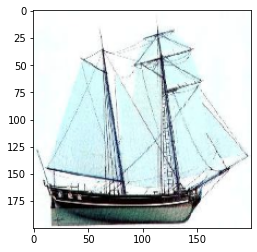

In [7]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

In [8]:
test_images[0:1].shape

(1, 200, 200, 3)

[0 0 1]


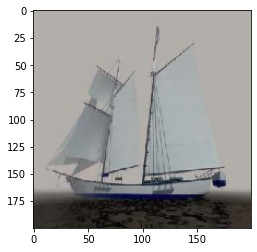

In [9]:
# Visualizing Training data
print(train_labels[4])
plt.imshow(train_images[4])

In [10]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(3,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [11]:
#Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 30)        8

In [12]:
# Training the model
history = model.fit(x_train,y_train,epochs=14,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/14
22/22 [==============================] - 93s 4s/step - loss: 1.8083 - acc: 0.6498 - val_loss: 0.2241 - val_acc: 0.9326
Epoch 2/14
22/22 [==============================] - 85s 4s/step - loss: 0.2119 - acc: 0.9345 - val_loss: 0.1172 - val_acc: 0.9625
Epoch 3/14
22/22 [==============================] - 85s 4s/step - loss: 0.0727 - acc: 0.9766 - val_loss: 0.0856 - val_acc: 0.9738
Epoch 4/14
22/22 [==============================] - 85s 4s/step - loss: 0.0324 - acc: 0.9888 - val_loss: 0.0566 - val_acc: 0.9888
Epoch 5/14
22/22 [==============================] - 83s 4s/step - loss: 0.0217 - acc: 0.9953 - val_loss: 0.0551 - val_acc: 0.9925
Epoch 6/14
22/22 [==============================] - 85s 4s/step - loss: 0.0157 - acc: 0.9953 - val_loss: 0.0521 - val_acc: 0.9925
Epoch 7/14
22/22 [==============================] - 85s 4s/step - loss: 0.0077 - acc: 0.9991 - val_loss: 0.0500 - val_acc: 0.9963
Epoch 8/14
22/22 [==============================] - 86s 4s/step - loss: 0.0048 - acc: 1.00

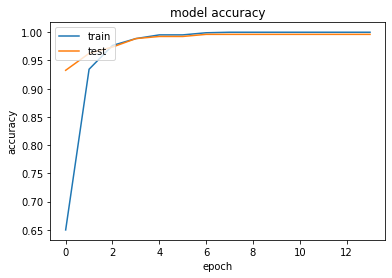

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

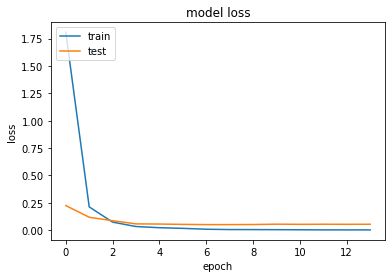

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

9/9 [==============================] - 5s 601ms/step - loss: 0.0534 - acc: 0.9963
[0.053408749401569366, 0.9962546825408936]


In [38]:
# Evaluating model on test data

evaluate1 = model.evaluate(test_images,test_labels)
print(evaluate1)

11/11 [==============================] - 7s 627ms/step - loss: 0.0091 - acc: 0.9970
[0.00913191121071577, 0.9970238208770752]


In [17]:
# Testing predictions and the actual label
checkImage = test_images[2:3]
checklabel = test_labels[2:3]

predict = model.predict(np.array(checkImage))

output = { 0:'Motorbikes',1:'airplanes',2:'schooner'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])



1/1 [==============================] - 0s 111ms/step
Actual :-  [[0 0 1]]
Predicted :-  schooner


1/1 [==============================] - 0s 36ms/step
Predicted :-  Motorbikes


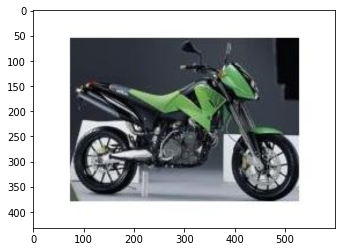

1/1 [==============================] - 0s 40ms/step
Predicted :-  Motorbikes


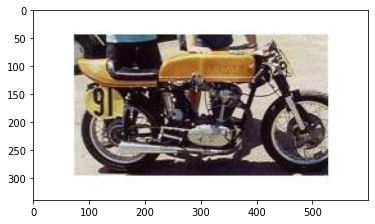

1/1 [==============================] - 0s 39ms/step
Predicted :-  Motorbikes


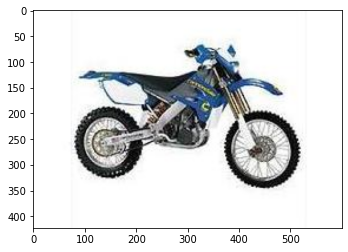

1/1 [==============================] - 0s 36ms/step
Predicted :-  airplanes


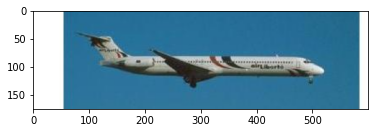

1/1 [==============================] - 0s 41ms/step
Predicted :-  airplanes


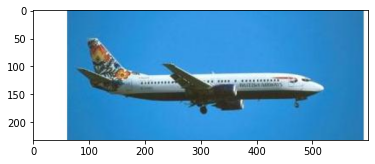

1/1 [==============================] - 0s 36ms/step
Predicted :-  airplanes


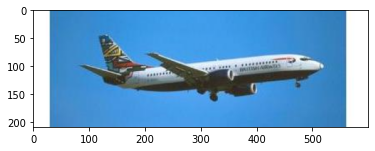

1/1 [==============================] - 0s 37ms/step
Predicted :-  schooner


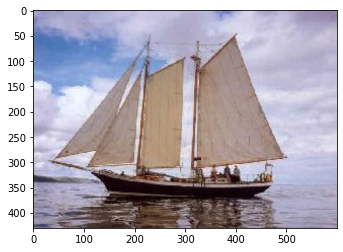

1/1 [==============================] - 0s 37ms/step
Predicted :-  schooner


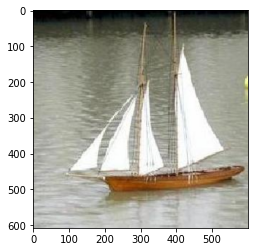

1/1 [==============================] - 0s 36ms/step
Predicted :-  schooner


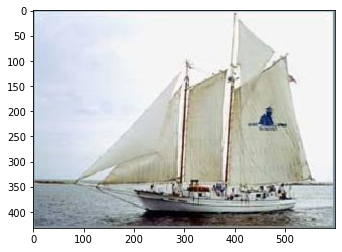

1/1 [==============================] - 0s 35ms/step
Predicted :-  airplanes


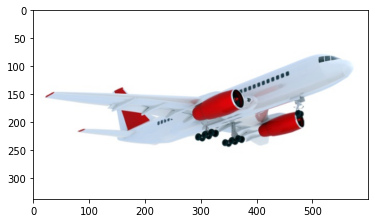

In [27]:
cntr = 0
tst_images = []
test_labels = []
path = '/content/drive/MyDrive/caltech101_classification/test_validation/'
          
for filename in os.listdir('/content/drive/MyDrive/caltech101_classification/test_validation/'):
        if filename.split('.')[1] == 'jpg':
            img = cv2.imread(os.path.join(path,filename))
            img = cv2.resize(img,(200,200))
            tst_images.append(img)
            
t= np.array(tst_images)       
c=0
for filename in os.listdir('/content/drive/MyDrive/caltech101_classification/test_validation/'):
    predict = model.predict(t[c:c+1])
    output = { 0:'Motorbikes',1:'airplanes',2:'schooner'}
    print("Predicted :- ",output[np.argmax(predict)])
    image = cv2.imread(path+filename)
    image = imutils.resize(image, width=600)
    (h, w) = image.shape[:2]
    imgplot = plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB).astype('uint8'))
    plt.show()
    c=c+1

References: 

https://www.projectpro.io/article/deep-learning-for-image-classification-in-python-with-cnn/418
https://www.kaggle.com/code/maricinnamon/multiclass-classification-caltech101-tensorflow
https://www.kaggle.com/code/prateek0x/multiclass-image-classification-using-keras/notebook
